Topic:        Challenge Set 5

Subject:      Linear Regression and Train/Test Split challenges

Date:         01/29/2018

Name:         Brian Kim

Worked with:  Chris Giler and Louisa Ying

In [139]:
## Reusing data set from project luther

#Preprocessing 
import itertools
from sklearn import preprocessing
import re
from sklearn import feature_selection as f_select
# import plotly.plotly as py
# import plotly.graph_objs as go
# from plotly import tools
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)
import pandas as pd
import numpy as np
import pickle 
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
% matplotlib inline

# import warnings
# warnings.filterwarnings('ignore')


sns.set_style("darkgrid")
import sklearn.linear_model
import os
import math
import statsmodels.api as sm
import pylab as pl
from sklearn.metrics import roc_curve, auc
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

%matplotlib inline




col_names = ['name', 'team', 'salary' ]
dfs = pd.read_csv('nba_salaries.csv', header=None, names = col_names)
dfp = pd.read_csv("nba_stats_2016.csv")



col_names = ['name', 'team', 'salary' ]
dfs = pd.read_csv('nba_salaries.csv', header=None, names = col_names)
dfp = pd.read_csv("nba_stats_2016.csv")


dfs = dfs.dropna(how='any')  



dfs[['name', 'position']] = dfs['name'].str.split(',\s+', expand=True)

dfs.salary = dfs.salary.replace({'\$': '', ',': ''}, regex=True)
dfs[pd.to_numeric(dfs['salary'], errors='coerce').notnull()]
dfs['player'] = dfs.name


dfs.salary = pd.to_numeric(dfs.salary, errors='coerce').dropna()
dfs = dfs.dropna(how='any')  
dfs.dtypes


#groupby player and sum total games played for all teams on which he played
dfp['total_g'] = dfp['G'].groupby(dfp['Player']).transform('sum')

df1 = dfs.merge(dfp, left_on = 'name', right_on = "Player", how = 'left')


df3 = df1[['name','salary', 'Age' ,'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PS/G']].copy()
df3 = df3.rename(columns={'FG%': 'FG_PCT', '3P%': '3P_PCT', \
'2P%': '2P_PCT', 'eFG%': 'eFG_PCT', 'FT%':"FT_PCT", 'PS/G': 'PS_G'})









df3=df3.rename(columns={'3P': "THREE_P", '3PA': 'THREE_PA', '3P_PCT': 'THREE_P_PCT', '2P': "TWO_P",\
                    '2PA':'TWO_PA', '2P_PCT': "TWO_P_PCT", 'PS/G': 'PS_G'})


df3.fillna(0, inplace=True)
df3.isnull().sum()


name           0
salary         0
Age            0
G              0
GS             0
MP             0
FG             0
FGA            0
FG_PCT         0
THREE_P        0
THREE_PA       0
THREE_P_PCT    0
TWO_P          0
TWO_PA         0
TWO_P_PCT      0
eFG_PCT        0
FT             0
FTA            0
FT_PCT         0
ORB            0
DRB            0
TRB            0
AST            0
STL            0
BLK            0
TOV            0
PF             0
PS_G           0
dtype: int64

In [51]:

dfs['name'].isin(dfp['Player']).value_counts()

True     340
False    112
Name: name, dtype: int64

## Prepocessing above
## Modeling below

Rk -- Rank Pos -- Position Age -- Age of Player at the start of February 1st of that season. Tm -- Team G -- Games GS -- Games Started MP -- Minutes Played Per Game FG -- Field Goals Per Game FGA -- Field Goal Attempts Per Game FG% -- Field Goal Percentage 3P -- 3-Point Field Goals Per Game 3PA -- 3-Point Field Goal Attempts Per Game 3P% -- FG% on 3-Pt FGAs. 2P -- 2-Point Field Goals Per Game 2PA -- 2-Point Field Goal Attempts Per Game 2P% -- FG% on 2-Pt FGAs. eFG% -- Effective Field Goal Percentage This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal. FT -- Free Throws Per Game FTA -- Free Throw Attempts Per Game FT% -- Free Throw Percentage ORB -- Offensive Rebounds Per Game DRB -- Defensive Rebounds Per Game TRB -- Total Rebounds Per Game AST -- Assists Per Game STL -- Steals Per Game BLK -- Blocks Per Game TOV -- Turnovers Per Game PF -- Personal Fouls Per Game PS/G -- Points Per Game

In [52]:
df3['salary_log']= np.log(df3.salary)



In [53]:
df3.describe()

,salary,Age,G,GS,MP,FG,FGA,FG_PCT,THREE_P,THREE_PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS_G,salary_log
count,4.920000e+02,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,5.696975e+06,20.365854,43.709350,21.707317,16.869106,2.639024,5.878049,0.345652,0.572561,1.629065,...,0.700407,2.283740,2.981707,1.592683,0.540854,0.338821,0.965854,1.416057,7.023171,14.805236
std,6.029553e+06,11.653880,31.191395,28.541314,11.954115,2.253827,4.919180,0.201824,0.684539,1.807393,...,0.762646,1.933429,2.592059,1.800143,0.477282,0.419117,0.850717,0.993342,6.076839,1.506301
min,5.767000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.659907
25%,1.187340e+06,20.000000,6.000000,0.000000,5.550000,0.575000,1.375000,0.317500,0.000000,0.000000,...,0.100000,0.675000,0.900000,0.100000,0.100000,0.000000,0.175000,0.475000,1.300000,13.987224
50%,3.333334e+06,24.000000,53.000000,4.000000,18.100000,2.400000,5.300000,0.423000,0.300000,1.100000,...,0.500000,2.100000,2.600000,1.100000,0.500000,0.200000,0.900000,1.600000,6.300000,15.019483
75%,8.072972e+06,28.000000,73.250000,41.500000,27.225000,4.125000,9.200000,0.467000,1.000000,2.900000,...,1.100000,3.400000,4.400000,2.200000,0.800000,0.500000,1.400000,2.200000,10.900000,15.904032
max,3.096345e+07,39.000000,82.000000,82.000000,42.000000,10.200000,20.500000,1.000000,5.100000,11.200000,...,3.500000,9.100000,11.800000,11.700000,2.100000,2.200000,4.100000,6.000000,30.100000,17.248318


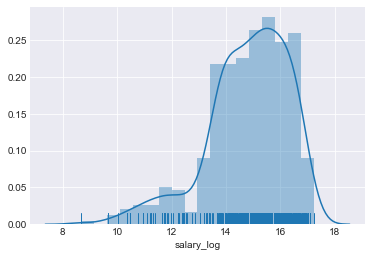

In [54]:
ax = sns.distplot(df3.salary_log, rug=True)  
plt.savefig('fig1')

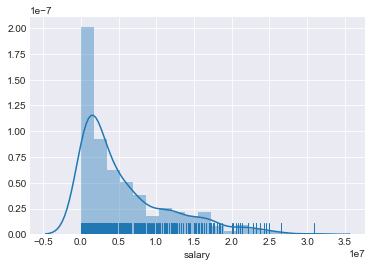

In [55]:
ax = sns.distplot(df3.salary, rug=True)  
plt.savefig('fig1')

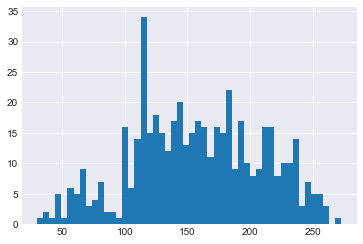

In [56]:
from scipy import stats
import numpy as np

# get values from our "AIR_TIME" column
salary_bx = np.asarray(df3[['salary']].values)

# transform values and store as "dft"
sal_bx_vals = stats.boxcox(salary_bx)[0]
df3['salary_bx'] = stats.boxcox(salary_bx)[0]
# plot the transformed data

plt.hist(sal_bx_vals, bins=50
        )


plt.savefig('sal_bx.png')

In [57]:
df3.head()

,name,salary,Age,G,GS,MP,FG,FGA,FG_PCT,THREE_P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PS_G,salary_log,salary_bx
0,LeBron James,30963450.0,31.0,76.0,76.0,35.6,9.7,18.6,0.520,1.1,...,6.0,7.4,6.8,1.4,0.6,3.3,1.9,25.3,17.248318,272.986339
1,Mike Conley,26540100.0,28.0,56.0,56.0,31.4,5.3,12.4,0.422,1.4,...,2.5,2.9,6.1,1.2,0.3,1.5,1.8,15.3,17.094167,262.742201
2,Al Horford,26540100.0,29.0,82.0,82.0,32.1,6.5,12.8,0.505,1.1,...,5.5,7.3,3.2,0.8,1.5,1.3,2.0,15.2,17.094167,262.742201
3,Dirk Nowitzki,25000000.0,37.0,75.0,75.0,31.5,6.6,14.8,0.448,1.7,...,5.8,6.5,1.8,0.7,0.7,1.1,2.1,18.3,17.034386,258.872138
4,Carmelo Anthony,24559380.0,31.0,72.0,72.0,35.1,7.9,18.2,0.434,1.5,...,6.4,7.7,4.2,0.9,0.5,2.4,2.5,21.8,17.016604,257.731848


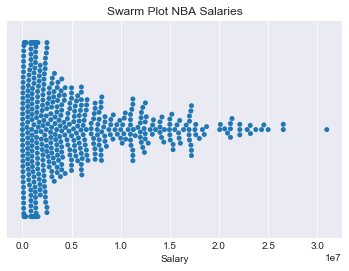

In [58]:
sns.set_style("darkgrid")
ax=sns.swarmplot(df3.salary)
ax.set(xlabel='Salary', 
       title='Swarm Plot NBA Salaries')

plt.legend();

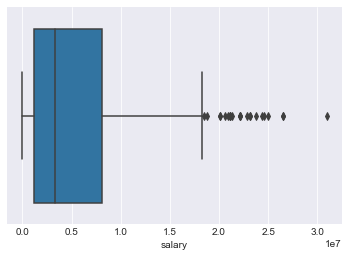

In [59]:
sns.boxplot(df3.salary,whis=1.5)

plt.savefig('salaryboxplot.png') 

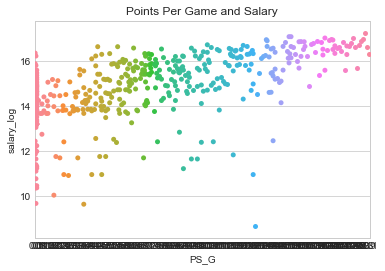

In [60]:
sns.set_style("whitegrid")
ax=sns.swarmplot(x = df3.PS_G, y = df3.salary_log)
ax.set(title='Points Per Game and Salary')

plt.legend();

In [61]:
lm1 = smf.ols('salary_log ~ MP +PS_G\
               +FT_PCT + Age+GS', data=df3)
# Fit the model
fit1 = lm1.fit()
# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             salary_log   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     53.54
Date:                Tue, 30 Jan 2018   Prob (F-statistic):           3.03e-44
Time:                        15:42:16   Log-Likelihood:                -791.23
No. Observations:                 492   AIC:                             1594.
Df Residuals:                     486   BIC:                             1620.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.6441      0.112    122.307      0.000      13.425      13.863
MP            -0.0078      0.016     -0.483      0.629      -0.039       0.024
PS_G           0.1194      0.024      4.909      0.000       0.072       0.167
FT_PCT        -0.2100      0.386     -0.544      0.587      -0.969       0.549
Age            0.0212      0.011      1.968      0.050    3.06e-05       0.042
GS             0.0065      0.003      2.046      0.041       0.000       0.013
==============================================================================
Omnibus:                      159.800   Durbin-Watson:                   0.524
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              498.108
Skew:                          -1.528   Prob(JB):                    6.87e-109
Kurtosis:                       6.868   Cond. No.                         320.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
#df3.corr()['salary_l'].sort_values(ascending=False)

In [63]:
lm1 = smf.ols('salary_bx ~PS_G\
               +FT_PCT + Age', data=df3)
# Fit the model
fit1 = lm1.fit()
# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              salary_bx   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     134.6
Date:                Tue, 30 Jan 2018   Prob (F-statistic):           1.48e-63
Time:                        15:42:16   Log-Likelihood:                -2488.4
No. Observations:                 492   AIC:                             4985.
Df Residuals:                     488   BIC:                             5002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    115.5885      3.502     33.004      0.000     108.707     122.470
PS_G           5.6445      0.388     14.545      0.000       4.882       6.407
FT_PCT       -27.2506     11.867     -2.296      0.022     -50.566      -3.935
Age            0.8829      0.316      2.793      0.005       0.262       1.504
==============================================================================
Omnibus:                       52.721   Durbin-Watson:                   0.778
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.119
Skew:                          -0.695   Prob(JB):                     1.99e-19
Kurtosis:                       4.506   Cond. No.                         171.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
lm_3 = smf.ols('salary_bx ~ Age+G+GS+MP+FG+FGA+FG_PCT+THREE_P+\
THREE_PA+THREE_P_PCT+TWO_P+TWO_PA+TWO_P_PCT+eFG_PCT+FT+FTA+FT_PCT\
+ORB+DRB+TRB+AST+STL+BLK+TOV+PF+PS_G',data = df3)
# Fit the model
fit_3= lm_3.fit()
# Print summary statistics of the model's performance
fit_3.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              salary_bx   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     20.14
Date:                Tue, 30 Jan 2018   Prob (F-statistic):           2.55e-60
Time:                        15:42:16   Log-Likelihood:                -2451.2
No. Observations:                 492   AIC:                             4956.
Df Residuals:                     465   BIC:                             5070.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     118.1556      3.394     34.818      0.000     111.487     124.824
Age             1.9199      0.450      4.268      0.000       1.036       2.804
G               0.3552      0.111      3.212      0.001       0.138       0.573
GS             -0.1106      0.109     -1.011      0.312      -0.326       0.104
MP              1.5697      0.706      2.222      0.027       0.182       2.958
FG            -22.1835     61.370     -0.361      0.718    -142.780      98.413
FGA            38.1786     42.589      0.896      0.370     -45.513     121.870
FG_PCT        -71.7294    142.663     -0.503      0.615    -352.072     208.614
THREE_P       -43.2837     53.049     -0.816      0.415    -147.529      60.962
THREE_PA      -50.4571     42.067     -1.199      0.231    -133.121      32.207
THREE_P_PCT   -34.7444     19.727     -1.761      0.079     -73.509       4.020
TWO_P         -23.6358     43.096     -0.548      0.584    -108.324      61.052
TWO_PA        -49.0493     42.934     -1.142      0.254    -133.418      35.319
TWO_P_PCT      33.5887     58.161      0.578      0.564     -80.702     147.879
eFG_PCT       -48.2899    118.302     -0.408      0.683    -280.762     184.182
FT            -24.4582     27.799     -0.880      0.379     -79.086      30.170
FTA            -5.4893      8.846     -0.621      0.535     -22.872      11.893
FT_PCT        -24.6351     14.459     -1.704      0.089     -53.049       3.779
ORB            33.2073     37.919      0.876      0.382     -41.306     107.720
DRB            27.7636     38.101      0.729      0.467     -47.108     102.635
TRB           -24.0822     38.032     -0.633      0.527     -98.817      50.653
AST             1.1993      2.353      0.510      0.611      -3.425       5.823
STL            -4.0864      7.340     -0.557      0.578     -18.511      10.338
BLK            -2.0458      7.178     -0.285      0.776     -16.152      12.060
TOV            -2.0783      6.931     -0.300      0.764     -15.699      11.542
PF            -17.0808      4.718     -3.620      0.000     -26.352      -7.810
PS_G           37.1841     25.785      1.442      0.150     -13.486      87.854
==============================================================================
Omnibus:                       36.907   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.510
Skew:                          -0.582   Prob(JB):                     1.08e-11
Kurtosis:                       4.053   Cond. No.                     7.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.82e+03. This might indicate that there are
strong multicollinearity o

In [65]:
df3.shape

(492, 30)

In [66]:
X =df3.iloc[:,3:25]
y= df3.iloc[:,29]


In [67]:

lr = LinearRegression()
# INSTRUCTOR NOTE: Run this multiple times to show the variation
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Fit the model against the training data
lr.fit(X_train, y_train)
# Evaluate the model against the testing data
lr.score(X_test, y_test)

0.44036550989192158

In [68]:
from sklearn.cross_validation import cross_val_score

reg = LinearRegression()
scores = cross_val_score(reg, X, y, cv=10, scoring='r2')

# scores output is negative, a sklearn quirk bc mse is used to min. optimization func.
print(scores)


[-21.91876382 -77.81449695 -40.15629648 -76.36186083 -39.98180271
 -55.50534172 -31.88129181 -42.18273678 -10.28833926 -36.61898295]


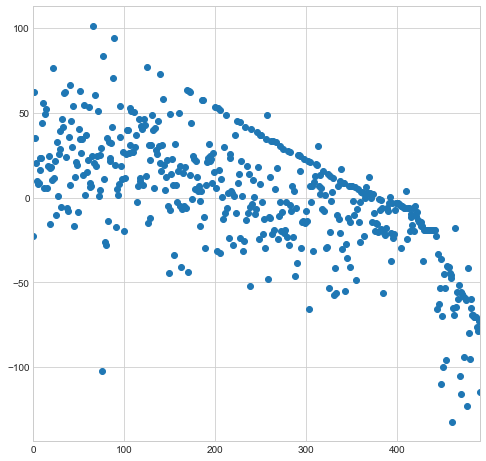

In [69]:
fit_3.resid.plot(style='o', figsize=(8,8))
plt.savefig('resplot.png')

In [70]:
est=LinearRegression()

kf=KFold(n=len(X),n_folds=5,shuffle=True)

all_scores=[]

# Instead of using cross_val_score, let's use sklearn.cross_validation.KFold; this will allow
# us to 'manipulate' our training set, 


# get indices of corresponding train & test
for train,test in kf:
    x_train=X.iloc[train]
    y_train=y.iloc[train]
    x_test=X.iloc[test]
    y_test=y.iloc[test]
    pvals=[]
    sig_cols=[]
    
    for feature in x_train.columns:
        pval=f_select.f_regression(x_train[[feature]],y_train)
        if pval[1][0]<.02: 
            sig_cols.append(feature)
            pvals.append(pval[1][0])
            
    est.fit(x_train[sig_cols],y_train)
    r_2=est.score(x_test[sig_cols],y_test)
    all_scores.append(r_2)
        
np.mean(all_scores)
    

0.41169340303795893

In [71]:
###Cut outliers
len(df3)

492

In [72]:
df5 = df3[:-49]

In [73]:
len(df5
   )

443

In [74]:
df5.tail()

,name,salary,Age,G,GS,MP,FG,FGA,FG_PCT,THREE_P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PS_G,salary_log,salary_bx
438,Thomas Walkup,543471.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.205732,99.073624
439,Diamond Stone,543471.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.205732,99.073624
440,Nicolas Brussino,543471.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.205732,99.073624
441,Jonathan Holmes,543471.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.205732,99.073624
442,Richard Solomon,543471.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.205732,99.073624


In [75]:
X =df5.iloc[:,3:25]
y= df5.iloc[:,29]


In [76]:
lm_5 = smf.ols('salary_bx ~ Age+G+GS+MP+FG+FGA+FG_PCT+THREE_P+\
THREE_PA+THREE_P_PCT+TWO_P+TWO_PA+TWO_P_PCT+eFG_PCT+FT+FTA+FT_PCT\
+ORB+DRB+TRB+AST+STL+BLK+TOV+PF+PS_G',data = df5)
# Fit the model
fit_5= lm_5.fit()
# Print summary statistics of the model's performance
fit_5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              salary_bx   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     28.66
Date:                Tue, 30 Jan 2018   Prob (F-statistic):           1.91e-76
Time:                        15:42:21   Log-Likelihood:                -2070.0
No. Observations:                 443   AIC:                             4194.
Df Residuals:                     416   BIC:                             4305.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     130.8328      2.768     47.266      0.000     125.392     136.274
Age             2.1049      0.346      6.077      0.000       1.424       2.786
G               0.1036      0.086      1.198      0.232      -0.066       0.274
GS             -0.1366      0.084     -1.627      0.104      -0.302       0.028
MP              2.4939      0.553      4.507      0.000       1.406       3.582
FG             -3.3303     47.081     -0.071      0.944     -95.877      89.217
FGA            26.4341     32.110      0.823      0.411     -36.684      89.552
FG_PCT         12.8426    114.889      0.112      0.911    -212.993     238.678
THREE_P       -16.9355     40.169     -0.422      0.674     -95.895      62.024
THREE_PA      -32.5761     31.826     -1.024      0.307     -95.135      29.983
THREE_P_PCT   -24.6989     17.276     -1.430      0.154     -58.659       9.261
TWO_P          -6.0467     32.971     -0.183      0.855     -70.858      58.764
TWO_PA        -35.6239     32.415     -1.099      0.272     -99.342      28.094
TWO_P_PCT     -13.4154     56.483     -0.238      0.812    -124.443      97.612
eFG_PCT       -94.9643    100.366     -0.946      0.345    -292.253     102.324
FT              3.2172     21.350      0.151      0.880     -38.751      45.186
FTA           -12.3850      6.749     -1.835      0.067     -25.652       0.882
FT_PCT        -42.2778     12.475     -3.389      0.001     -66.799     -17.757
ORB            15.4406     28.653      0.539      0.590     -40.883      71.764
DRB            20.2739     28.776      0.705      0.481     -36.291      76.839
TRB           -15.2103     28.746     -0.529      0.597     -71.715      41.295
AST             3.9777      1.783      2.231      0.026       0.472       7.483
STL            -8.8766      5.694     -1.559      0.120     -20.070       2.317
BLK             2.2854      5.604      0.408      0.684      -8.730      13.301
TOV           -13.7272      5.419     -2.533      0.012     -24.379      -3.076
PF             -2.9863      3.934     -0.759      0.448     -10.719       4.746
PS_G           16.2141     19.835      0.817      0.414     -22.775      55.203
==============================================================================
Omnibus:                        3.049   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                2.862
Skew:                           0.192   Prob(JB):                        0.239
Kurtosis:                       3.086   Cond. No.                     8.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.39e+03. This might indicate that there are
strong multicollinearity o

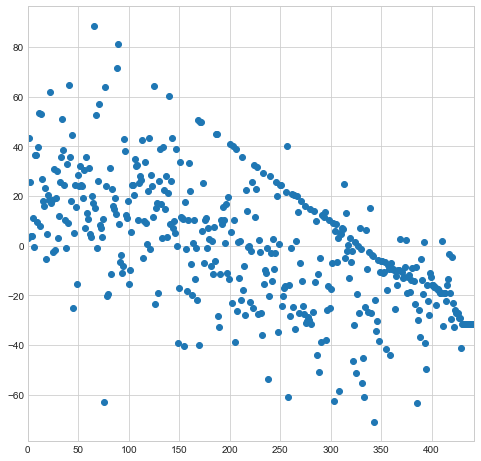

In [77]:
fit_5.resid.plot(style='o', figsize=(8,8))
plt.savefig('resplot.png')

In [98]:
lr = LinearRegression()
# INSTRUCTOR NOTE: Run this multiple times to show the variation
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Fit the model against the training data
lr.fit(X_train, y_train)
# Evaluate the model against the testing data
print (lr.score(X_train, y_train))
lr.score(X_test, y_test)

0.579895319524


0.38776149222611273

In [101]:
reg = LinearRegression()
scores = cross_val_score(reg, X, y, cv=10)

# scores output is negative, a sklearn quirk bc mse is used to min. optimization func.
print(scores)


[ -81.11367025 -118.88052188  -57.1775241   -81.17214958  -34.734791
  -56.61940142  -68.18130974  -54.55833701 -113.86150942  -27.31403098]


In [80]:
##drop top 20 
df7 = df5[19:]

In [81]:
df7.to_pickle('nbadata.pkl')

In [36]:
df700 = pd.read_pickle('nbadata.pkl')

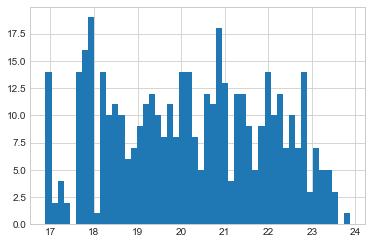

In [82]:
# get values from our "AIR_TIME" column
salary_bx = np.asarray(df5[['salary']].values)

# transform values and store as "dft"
sal_bx_vals = stats.boxcox(salary_bx)[0]
df5['salary_bx'] = stats.boxcox(salary_bx)[0]
# plot the transformed data

plt.hist(sal_bx_vals, bins=50
        )
plt.show()

In [83]:
X =df7.iloc[:,3:25]
y= df7.iloc[:,29]


In [127]:
y.describe()

count    424.000000
mean      20.046228
std        1.700455
min       16.887345
25%       18.558676
50%       20.093063
75%       21.421264
max       23.077944
Name: salary_bx, dtype: float64

In [131]:
X.describe()

,G,GS,MP,FG,FGA,FG_PCT,THREE_P,THREE_PA,THREE_P_PCT,TWO_P,...,eFG_PCT,FT,FTA,FT_PCT,ORB,DRB,TRB,AST,STL,BLK
count,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,...,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000
mean,45.002358,21.103774,16.810613,2.596934,5.778538,0.351743,0.567689,1.612264,0.217467,2.029717,...,0.388979,1.143868,1.522877,0.571637,0.719104,2.263208,2.979717,1.538679,0.541274,0.335613
std,30.922805,28.168584,11.561144,2.127422,4.661145,0.197154,0.676326,1.782656,0.170640,1.789069,...,0.213538,1.172240,1.489830,0.329308,0.766613,1.850363,2.515449,1.721321,0.474523,0.403097
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,0.000000,6.875000,0.775000,1.675000,0.338000,0.000000,0.000000,0.000000,0.500000,...,0.384500,0.200000,0.375000,0.472250,0.100000,0.800000,0.975000,0.200000,0.100000,0.000000
50%,54.000000,4.000000,18.050000,2.400000,5.300000,0.425500,0.300000,1.100000,0.300000,1.750000,...,0.481000,0.900000,1.200000,0.727000,0.500000,2.100000,2.600000,1.100000,0.500000,0.200000
75%,74.250000,39.000000,26.325000,3.800000,8.800000,0.468250,1.000000,2.900000,0.360000,3.200000,...,0.520000,1.600000,2.300000,0.800500,1.100000,3.400000,4.400000,2.100000,0.800000,0.500000
max,82.000000,82.000000,36.900000,10.200000,20.500000,1.000000,5.100000,11.200000,0.667000,8.400000,...,1.000000,7.300000,10.200000,1.000000,3.500000,9.100000,11.500000,11.700000,2.100000,2.200000


In [137]:
lr = LinearRegression()
# INSTRUCTOR NOTE: Run this multiple times to show the variation
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Fit the model against the training data
lr.fit(X_train, y_train)
# Evaluate the model against the testing data
print (lr.score(X_train, y_train))
lr.score(X_test, y_test)

0.532151135433


0.52688462096645527

In [138]:
reg = LinearRegression()
scores = cross_val_score(reg, X, y, cv=2, scoring='r2')

# scores output is negative, a sklearn quirk bc mse is used to min. optimization func.
print(scores)


[-7.97566131 -6.54494712]


In [136]:
est=LinearRegression()

kf=KFold(n=len(X),n_folds=5,shuffle=True)

all_scores=[]

for train,test in kf:
    x_train=X.iloc[train]
    y_train=y.iloc[train]
    x_test=X.iloc[test]
    y_test=y.iloc[test]
    pvals=[]
    sig_cols=[]
    
#     for feature in x_train.columns:
#         pval=f_select.f_regression(x_train[[feature]],y_train)
#         if pval[1][0]<.02: 
#             sig_cols.append(feature)
#             pvals.append(pval[1][0])
            
    est.fit(x_train[sig_cols],y_train)
    r_2=est.score(x_test[sig_cols],y_test)
    all_scores.append(r_2)
        
np.mean(all_scores)

0.47727072860414504

In [86]:
##just for kicks
## field goal attempts per game had a coeff of .99
lm_9 = smf.ols('salary_bx ~ FGA',data = df5)
# Fit the model
fit_9= lm_9.fit()
# Print summary statistics of the model's performance
fit_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              salary_bx   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     423.3
Date:                Tue, 30 Jan 2018   Prob (F-statistic):           1.97e-66
Time:                        15:42:38   Log-Likelihood:                -737.70
No. Observations:                 443   AIC:                             1479.
Df Residuals:                     441   BIC:                             1488.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.6221      0.097    191.063      0.000      18.430      18.814
FGA            0.2541      0.012     20.575      0.000       0.230       0.278
==============================================================================
Omnibus:                       11.983   Durbin-Watson:                   0.960
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                6.733
Skew:                           0.096   Prob(JB):                       0.0345
Kurtosis:                       2.428   Cond. No.                         12.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
df3

,name,salary,Age,G,GS,MP,FG,FGA,FG_PCT,THREE_P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PS_G,salary_log,salary_bx
0,LeBron James,30963450.0,31.0,76.0,76.0,35.6,9.7,18.6,0.520,1.1,...,6.0,7.4,6.8,1.4,0.6,3.3,1.9,25.3,17.248318,272.986339
1,Mike Conley,26540100.0,28.0,56.0,56.0,31.4,5.3,12.4,0.422,1.4,...,2.5,2.9,6.1,1.2,0.3,1.5,1.8,15.3,17.094167,262.742201
2,Al Horford,26540100.0,29.0,82.0,82.0,32.1,6.5,12.8,0.505,1.1,...,5.5,7.3,3.2,0.8,1.5,1.3,2.0,15.2,17.094167,262.742201
3,Dirk Nowitzki,25000000.0,37.0,75.0,75.0,31.5,6.6,14.8,0.448,1.7,...,5.8,6.5,1.8,0.7,0.7,1.1,2.1,18.3,17.034386,258.872138
4,Carmelo Anthony,24559380.0,31.0,72.0,72.0,35.1,7.9,18.2,0.434,1.5,...,6.4,7.7,4.2,0.9,0.5,2.4,2.5,21.8,17.016604,257.731848
5,Damian Lillard,24328425.0,25.0,75.0,75.0,35.7,8.2,19.7,0.419,3.1,...,3.4,4.0,6.8,0.9,0.4,3.2,2.2,25.1,17.007156,257.127969
6,Chris Bosh,23741060.0,31.0,53.0,53.0,33.5,6.8,14.5,0.467,1.5,...,6.5,7.4,2.4,0.7,0.6,1.5,1.9,19.1,16.982717,255.572424
7,Dwyane Wade,23200000.0,34.0,74.0,73.0,30.5,7.3,16.0,0.456,0.1,...,3.0,4.1,4.6,1.1,0.6,2.7,1.6,19.0,16.959663,254.113564
8,Dwight Howard,23180275.0,30.0,71.0,71.0,32.1,5.2,8.5,0.620,0.0,...,8.4,11.8,1.4,1.0,1.6,2.3,3.1,13.7,16.958812,254.059896
9,Chris Paul,22868827.0,30.0,74.0,74.0,32.7,7.0,15.1,0.462,1.6,...,3.7,4.2,10.0,2.1,0.2,2.6,2.5,19.5,16.945285,253.207894


In [88]:
df3['ones']= 1

### Challenges 5 and 6 


In [89]:
df3.to_pickle('df3.pkl')

In [90]:
df3= pd.read_pickle('df3.pkl')

In [91]:
df100=df3


In [92]:
df100


,name,salary,Age,G,GS,MP,FG,FGA,FG_PCT,THREE_P,...,TRB,AST,STL,BLK,TOV,PF,PS_G,salary_log,salary_bx,ones
0,LeBron James,30963450.0,31.0,76.0,76.0,35.6,9.7,18.6,0.520,1.1,...,7.4,6.8,1.4,0.6,3.3,1.9,25.3,17.248318,272.986339,1
1,Mike Conley,26540100.0,28.0,56.0,56.0,31.4,5.3,12.4,0.422,1.4,...,2.9,6.1,1.2,0.3,1.5,1.8,15.3,17.094167,262.742201,1
2,Al Horford,26540100.0,29.0,82.0,82.0,32.1,6.5,12.8,0.505,1.1,...,7.3,3.2,0.8,1.5,1.3,2.0,15.2,17.094167,262.742201,1
3,Dirk Nowitzki,25000000.0,37.0,75.0,75.0,31.5,6.6,14.8,0.448,1.7,...,6.5,1.8,0.7,0.7,1.1,2.1,18.3,17.034386,258.872138,1
4,Carmelo Anthony,24559380.0,31.0,72.0,72.0,35.1,7.9,18.2,0.434,1.5,...,7.7,4.2,0.9,0.5,2.4,2.5,21.8,17.016604,257.731848,1
5,Damian Lillard,24328425.0,25.0,75.0,75.0,35.7,8.2,19.7,0.419,3.1,...,4.0,6.8,0.9,0.4,3.2,2.2,25.1,17.007156,257.127969,1
6,Chris Bosh,23741060.0,31.0,53.0,53.0,33.5,6.8,14.5,0.467,1.5,...,7.4,2.4,0.7,0.6,1.5,1.9,19.1,16.982717,255.572424,1
7,Dwyane Wade,23200000.0,34.0,74.0,73.0,30.5,7.3,16.0,0.456,0.1,...,4.1,4.6,1.1,0.6,2.7,1.6,19.0,16.959663,254.113564,1
8,Dwight Howard,23180275.0,30.0,71.0,71.0,32.1,5.2,8.5,0.620,0.0,...,11.8,1.4,1.0,1.6,2.3,3.1,13.7,16.958812,254.059896,1
9,Chris Paul,22868827.0,30.0,74.0,74.0,32.7,7.0,15.1,0.462,1.6,...,4.2,10.0,2.1,0.2,2.6,2.5,19.5,16.945285,253.207894,1


### Challenge 5.1 


In [93]:
lm100 = smf.ols('salary_log ~ ones', data=df100)
# Fit the model
fit100 = lm100.fit()
# Print summary statistics of the model's performance
fit100.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             salary_log   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Tue, 30 Jan 2018   Prob (F-statistic):                nan
Time:                        15:43:03   Log-Likelihood:                -899.17
No. Observations:                 492   AIC:                             1800.
Df Residuals:                     491   BIC:                             1805.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4026      0.034    218.015      0.000       7.336       7.469
ones           7.4026      0.034    218.015      0.000       7.336       7.469
==============================================================================
Omnibus:                       74.529   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.477
Skew:                          -1.009   Prob(JB):                     1.69e-24
Kurtosis:                       4.126   Cond. No.                     2.92e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.15e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [161]:
y_pred = fit100.predict(X)
X = df100.ones

Text(0.5,1,'Ones and Salary')

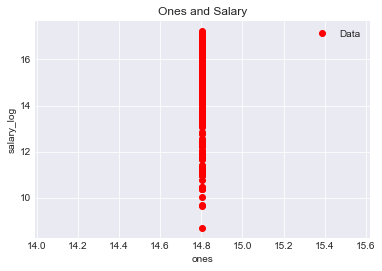

In [162]:
#fit100.plot(style='', figsize=(6,4))
#plt.savefig('resplot100.png')

plt.plot(y_pred,  df100["salary_log"] ,'ro')
#plt.plot(y_pred, df100["salary_log"], 'b')
plt.legend(['Data', 'Fitted model'])

plt.xlabel('ones')
plt.ylabel('salary_log')
plt.title('Ones and Salary')

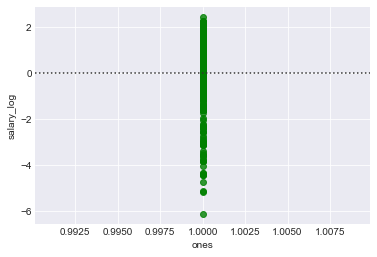

In [163]:
X = df100.ones
y = df100.salary_log

sns.residplot(X, y, lowess=True, color="g")



In [164]:
result = smf.ols('salary_log ~ ones', df100).fit()
df100['yhat'] = result.fittedvalues
df100['resid'] = result.resid


# result2 = sm.OLS(df['y'], sm.add_constant(df[['x1', 'x2']])).fit()
# df['yhat2'] = result2.fittedvalues
# df['resid2'] = result2.resid


In [165]:
### 5.2 add one continuous variable

In [166]:
lm200 = smf.ols('salary_log ~ ones + PS_G', data=df100)
# Fit the model
fit200 = lm200.fit()
# Print summary statistics of the model's performance
fit200.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             salary_log   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     254.7
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           1.78e-46
Time:                        15:06:11   Log-Likelihood:                -796.20
No. Observations:                 492   AIC:                             1596.
Df Residuals:                     490   BIC:                             1605.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8936      0.042    163.506      0.000       6.811       6.976
ones           6.8936      0.042    163.506      0.000       6.811       6.976
PS_G           0.1450      0.009     15.959      0.000       0.127       0.163
==============================================================================
Omnibus:                      157.642   Durbin-Watson:                   0.514
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              474.943
Skew:                          -1.521   Prob(JB):                    7.37e-104
Kurtosis:                       6.730   Cond. No.                     1.14e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.33e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

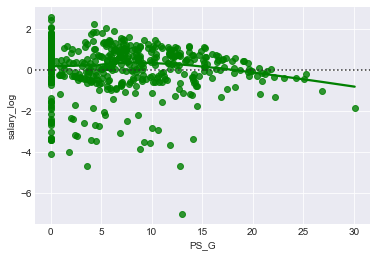

In [175]:
X = df100.PS_G
y_pred_psg = df100.salary_log

sns.residplot(X, y, lowess=True, color="g")


In [168]:
df100["PS_G"].describe()

count    492.000000
mean       7.023171
std        6.076839
min        0.000000
25%        1.300000
50%        6.300000
75%       10.900000
max       30.100000
Name: PS_G, dtype: float64

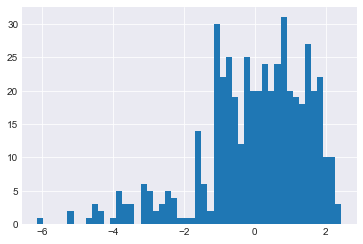

In [169]:
plt.hist(df100.resid, bins=50
        )
plt.show()

In [187]:
df100['bins_psg'] =pd.qcut(df100['PS_G'], 3, labels=["low", "average", "high"])

In [188]:
df100

,name,salary,Age,G,GS,MP,FG,FGA,FG_PCT,THREE_P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS_G,bins_psg
0,LeBron James,30963450.0,31.0,76.0,76.0,35.6,9.7,18.6,0.520,1.1,...,1.5,6.0,7.4,6.8,1.4,0.6,3.3,1.9,25.3,high
1,Mike Conley,26540100.0,28.0,56.0,56.0,31.4,5.3,12.4,0.422,1.4,...,0.5,2.5,2.9,6.1,1.2,0.3,1.5,1.8,15.3,high
2,Al Horford,26540100.0,29.0,82.0,82.0,32.1,6.5,12.8,0.505,1.1,...,1.8,5.5,7.3,3.2,0.8,1.5,1.3,2.0,15.2,high
3,Dirk Nowitzki,25000000.0,37.0,75.0,75.0,31.5,6.6,14.8,0.448,1.7,...,0.7,5.8,6.5,1.8,0.7,0.7,1.1,2.1,18.3,high
4,Carmelo Anthony,24559380.0,31.0,72.0,72.0,35.1,7.9,18.2,0.434,1.5,...,1.4,6.4,7.7,4.2,0.9,0.5,2.4,2.5,21.8,high
5,Damian Lillard,24328425.0,25.0,75.0,75.0,35.7,8.2,19.7,0.419,3.1,...,0.6,3.4,4.0,6.8,0.9,0.4,3.2,2.2,25.1,high
6,Chris Bosh,23741060.0,31.0,53.0,53.0,33.5,6.8,14.5,0.467,1.5,...,0.9,6.5,7.4,2.4,0.7,0.6,1.5,1.9,19.1,high
7,Dwyane Wade,23200000.0,34.0,74.0,73.0,30.5,7.3,16.0,0.456,0.1,...,1.1,3.0,4.1,4.6,1.1,0.6,2.7,1.6,19.0,high
8,Dwight Howard,23180275.0,30.0,71.0,71.0,32.1,5.2,8.5,0.620,0.0,...,3.4,8.4,11.8,1.4,1.0,1.6,2.3,3.1,13.7,high
9,Chris Paul,22868827.0,30.0,74.0,74.0,32.7,7.0,15.1,0.462,1.6,...,0.5,3.7,4.2,10.0,2.1,0.2,2.6,2.5,19.5,high


In [189]:
df100 = pd.get_dummies(df100, columns=['bins_psg'])



In [190]:
df100.columns



Index(['name', 'salary', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG_PCT',
       'THREE_P', 'THREE_PA', 'THREE_P_PCT', 'TWO_P', 'TWO_PA', 'TWO_P_PCT',
       'eFG_PCT', 'FT', 'FTA', 'FT_PCT', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PS_G', 'bins_psg_low', 'bins_psg_average',
       'bins_psg_high'],
      dtype='object')

In [193]:
df200= df100[['salary', 'bins_psg_average', 'bins_psg_high']]




In [196]:
df200['salary_log'] = np.log(df200['salary'])


In [197]:
df200

,salary,bins_psg_average,bins_psg_high,salary_log
0,30963450.0,0,1,17.248318
1,26540100.0,0,1,17.094167
2,26540100.0,0,1,17.094167
3,25000000.0,0,1,17.034386
4,24559380.0,0,1,17.016604
5,24328425.0,0,1,17.007156
6,23741060.0,0,1,16.982717
7,23200000.0,0,1,16.959663
8,23180275.0,0,1,16.958812
9,22868827.0,0,1,16.945285


In [199]:
result = smf.ols('salary_log ~ bins_psg_average + bins_psg_high', df200)



# Fit the model
fit200 = result.fit()
# Print summary statistics of the model's performance
fit200.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             salary_log   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     108.2
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           1.27e-39
Time:                        15:35:11   Log-Likelihood:                -809.06
No. Observations:                 492   AIC:                             1624.
Df Residuals:                     489   BIC:                             1637.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           13.7372      0.098    139.980      0.000      13.544      13.930
bins_psg_average     1.1809      0.138      8.560      0.000       0.910       1.452
bins_psg_high        2.0443      0.140     14.638      0.000       1.770       2.319
==============================================================================
Omnibus:                      155.347   Durbin-Watson:                   0.529
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              441.152
Skew:                          -1.526   Prob(JB):                     1.60e-96
Kurtosis:                       6.493   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
result = smf.ols('salary_log ~ GS + bins_psg_average + bins_psg_high', df200)


In [200]:
df300= df100[['salary', 'bins_psg_average', 'bins_psg_high', "GS"]]

In [202]:
df300['salary_log'] = np.log(df300['salary'])

In [203]:
result = smf.ols('salary_log ~ GS + bins_psg_average + bins_psg_high', df300)


In [204]:
res = result.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             salary_log   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     80.40
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           2.82e-42
Time:                        15:45:25   Log-Likelihood:                -800.37
No. Observations:                 492   AIC:                             1609.
Df Residuals:                     488   BIC:                             1626.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           13.7262      0.097    142.160      0.000      13.536      13.916
GS                   0.0117      0.003      4.187      0.000       0.006       0.017
bins_psg_average     1.0147      0.141      7.178      0.000       0.737       1.292
bins_psg_high        1.4691      0.194      7.562      0.000       1.087       1.851
==============================================================================
Omnibus:                      144.272   Durbin-Watson:                   0.555
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              366.493
Skew:                          -1.465   Prob(JB):                     2.61e-80
Kurtosis:                       6.049   Cond. No.                         144.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [207]:
X=df300[['GS','bins_psg_average','bins_psg_high' ]]
y= df300.salary_log


lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

lr.fit(X_train, y_train)

lr.score(X_test, y_test)


0.32949539421975338

In [208]:
lr.score(X_train, y_train)

0.32842499740611097